 ### Data preparation steps:
     1. Importing datasets
     2. Removing missing values
     3. Aggregating RFM values
         - R : Recency -> How recent customer purchased any of the item.
         - F : Frequency -> How frequent?
         - M : Monetory -> Value of last purchase
     4. Outlier treatment

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail_df = pd.read_csv('Online+Retail.csv', sep=',', encoding="ISO-8859-1", header=0)

In [3]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
retail_df.shape

(541909, 8)

In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


##### Cleaning the data

In [6]:
round((retail_df.isnull().sum()/len(retail_df))*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
# drop all rows having missing values
## Even though 25% is more to be dropped, however of business analysis, customer ID is mandatory 

In [8]:
retail_df=retail_df.dropna()

In [9]:
retail_df.shape

(406829, 8)

In [10]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
round((retail_df.isnull().sum()/len(retail_df))*100,2)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [12]:
# Add new column as amount
retail_df['amount'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [13]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


##### Data preparation for modelling

In [14]:
#Based on use case, the final data frame should have below mentioned columns:
# cust_id, Recency, Frequency, Monetory

In [15]:
# Monetory
groupeddf = retail_df.groupby('CustomerID')['amount'].sum()

In [16]:
groupeddf = groupeddf.reset_index()
groupeddf.columns = ['CustomerID','monetory']

In [17]:
groupeddf.head()

,CustomerID,monetory
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [18]:
# Frequency
frequencydf = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequencydf = frequencydf.reset_index()
frequencydf.columns = ['CustomerID','frequency']

In [19]:
frequencydf.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [20]:
#merge two dataframe
groupeddf = pd.merge(groupeddf, frequencydf,on='CustomerID', how='inner')

In [21]:
groupeddf.head()

,CustomerID,monetory,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [22]:
#Recency
## First we need to convert datatime in number format. Take reference date and calculate min 

In [23]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [24]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [25]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [26]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [27]:
#compute the max date
max_date = max(retail_df['InvoiceDate'])

In [28]:
max_date

Timestamp('2011-12-09 12:50:00')

In [29]:
#compute the difference 

In [30]:
retail_df['diff'] = max_date - retail_df['InvoiceDate']

In [31]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [32]:
#Recency

In [33]:
recency_df = retail_df.groupby('CustomerID')['diff'].min()

In [34]:
last_purchase = recency_df.reset_index()
last_purchase.columns = ['CustomerID','recency']

In [35]:
last_purchase.head()

,CustomerID,recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [36]:
groupeddf.head()

,CustomerID,monetory,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [37]:
final_df = pd.merge(groupeddf,last_purchase, on='CustomerID', how='inner')

In [38]:
final_df.head()

,CustomerID,monetory,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [39]:
final_df['recency'] = final_df['recency'].apply(lambda x : int(str(x).split(' ')[0]))

In [40]:
final_df.head()

,CustomerID,monetory,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [41]:
# 1. Outlier treatment


{'whiskers': [<matplotlib.lines.Line2D at 0x7fda80feffd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fda810258e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fda80fefc40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fda810251c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fda81030220>],
 'means': []}

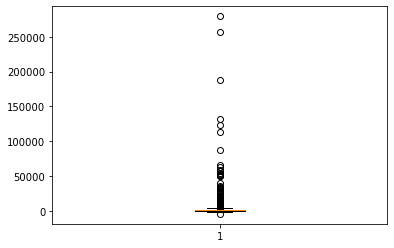

In [42]:
plt.boxplot(final_df.monetory)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fda80e82460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fda80e82b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fda80e820d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fda70ecc2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fda70ecc670>],
 'means': []}

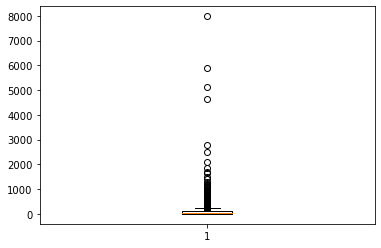

In [43]:
plt.boxplot(final_df.frequency)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fda60f80610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fda60f80d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fda60f80280>],
 'medians': [<matplotlib.lines.Line2D at 0x7fda60f8d490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fda60f8d820>],
 'means': []}

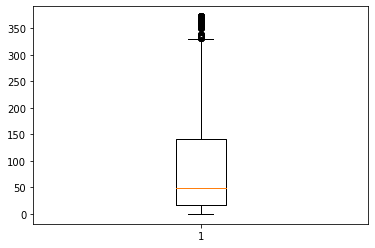

In [44]:
plt.boxplot(final_df.recency)

In [45]:
# Two types of outliers:
# 1. Statistical - based on percentile
# 2. Domain specific - 

In [46]:
#imp - Without removal of outliers, we have seen mismatchs in the distribution of datasets into cluster. 
# Hence, revisitng this stage to remove the outliers first and re-do all the steps with. k=3

In [47]:
Q1 = final_df.monetory.quantile(0.05)
Q3 = final_df.monetory.quantile(0.95)
IQR = Q3 - Q1
final_df = final_df[(final_df.monetory >= Q1 - 1.5*IQR) & (final_df.monetory <= Q3 + 1.5*IQR)]


In [48]:
Q1 = final_df.frequency.quantile(0.05)
Q3 = final_df.frequency.quantile(0.95)
IQR = Q3 - Q1
final_df = final_df[(final_df.frequency >= Q1 - 1.5*IQR) & (final_df.frequency <= Q3 + 1.5*IQR)]

In [49]:
Q1 = final_df.recency.quantile(0.05)
Q3 = final_df.recency.quantile(0.95)
IQR = Q3 - Q1
final_df = final_df[(final_df.recency >= Q1 - 1.5*IQR) & (final_df.recency <= Q3 + 1.5*IQR)]

In [50]:
# 2. rescaling variables

In [51]:
final_df.head()

,CustomerID,monetory,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [52]:
rfm_df = final_df[['monetory','frequency','recency']]

In [53]:
rfm_df.head()

,monetory,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [54]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [55]:
# instantiate 
scaler = StandardScaler()

# fit_transform 
rfm_df_scaled = scaler.fit_transform(rfm_df)

In [56]:
rfm_df_scaled.shape

(4293, 3)

In [57]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['monetory','frequency','recency']

In [58]:
rfm_df_scaled.head()

,monetory,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [59]:
rfm_df_scaled.describe()

,monetory,frequency,recency
count,4.293000e+03,4.293000e+03,4.293000e+03
mean,4.965358e-17,-4.807281e-17,1.693911e-17
std,1.000116e+00,1.000116e+00,1.000116e+00
min,-3.166350e+00,-7.628617e-01,-9.163671e-01
25%,-5.588933e-01,-6.032747e-01,-7.480421e-01
50%,-3.631428e-01,-3.738683e-01,-4.212935e-01
75%,1.412932e-01,1.946605e-01,5.193464e-01
max,7.068221e+00,6.388632e+00,2.776882e+00


In [60]:
# Modelling

In [61]:
from sklearn.cluster import KMeans

In [62]:
#k-means with some arbitory k
kmeans = KMeans(n_clusters=4, max_iter=50)

In [63]:
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [64]:
len(kmeans.labels_)

4293

In [65]:
## Finding the optimal number of clusters 

### - elbow curve / SSD (sum of squared distances)

### intertia_ is a method in KMean class : Sum of squared distance of samples to their closest cluster center.

In [66]:
range_n_cluster = [2,3,4,5,6,7,8]

In [67]:
ssd = []
for num_clusters in range_n_cluster:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    

In [68]:
ssd_df = pd.DataFrame(list(zip(range_n_cluster,ssd)), columns=['no_of_clusters','ssd'])

In [69]:
ssd_df.head()

,no_of_clusters,ssd
0,2,7661.705869
1,3,4433.580619
2,4,3360.719103
3,5,2802.824128
4,6,2392.150024


<AxesSubplot:xlabel='no_of_clusters', ylabel='ssd'>

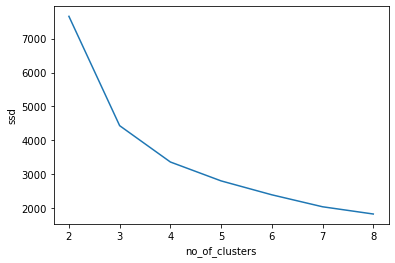

In [70]:
sns.lineplot(data=ssd_df, x='no_of_clusters',y='ssd')

In [71]:
### Silhouette Analysis
# p - the mean distance to the points in the nearest cluster that the data point is not a part of 
# q - the mean intra-cluster distance to all the points in its own cluster.

### - The value of the silhouette score ranges lies between -1 and 1.
#   - A score closer to 1 indicates that the data point is very similar to other data points in the cluster.
#   - A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
sc_lst=[]
for num_clusters in range_n_cluster:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_lables = kmeans.labels_
    
    sc=silhouette_score(rfm_df_scaled, cluster_lables)
    sc_lst.append(sc)
    print(f'For n_clusters = {num_clusters}, the silouette score is {round(sc,2)}')

For n_clusters = 2, the silouette score is 0.54
For n_clusters = 3, the silouette score is 0.51
For n_clusters = 4, the silouette score is 0.48
For n_clusters = 5, the silouette score is 0.47
For n_clusters = 6, the silouette score is 0.42
For n_clusters = 7, the silouette score is 0.42
For n_clusters = 8, the silouette score is 0.4


In [74]:
sc_df = pd.DataFrame(list(zip(range_n_cluster,sc_lst)))
sc_df.columns = ['no_of_clusters','sc_score']

In [75]:
sc_df.head()

,no_of_clusters,sc_score
0,2,0.541125
1,3,0.508490
2,4,0.479434
3,5,0.466270
4,6,0.417531


<AxesSubplot:xlabel='no_of_clusters', ylabel='sc_score'>

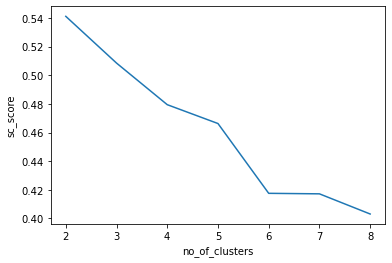

In [76]:
sns.lineplot(data=sc_df, x= 'no_of_clusters',y='sc_score')

In [77]:
# Final model with K = 3

In [78]:
kmeans = KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [79]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

In [80]:
#Assign the labels to main dataframe with customer id
final_df.head()

,CustomerID,monetory,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [81]:
final_df['cluster_id'] = kmeans.labels_

In [82]:
final_df.head()

,CustomerID,monetory,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


In [83]:
final_df.cluster_id.value_counts()

0    2726
2    1068
1     499
Name: cluster_id, dtype: int64

<AxesSubplot:xlabel='cluster_id', ylabel='monetory'>

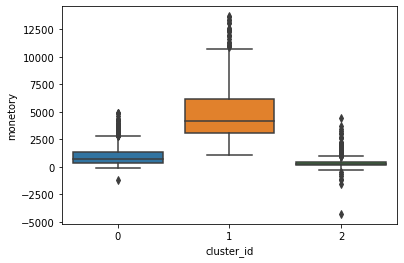

In [84]:
sns.boxplot(x='cluster_id', y = 'monetory', data=final_df)

<AxesSubplot:xlabel='cluster_id', ylabel='recency'>

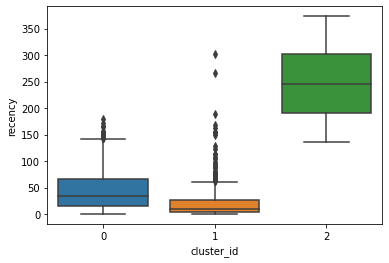

In [85]:
sns.boxplot(x='cluster_id', y = 'recency', data=final_df)

<AxesSubplot:xlabel='cluster_id', ylabel='frequency'>

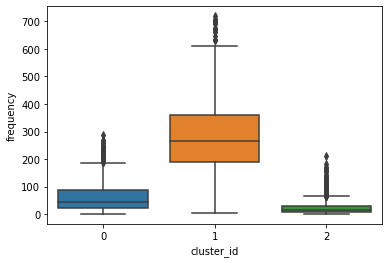

In [86]:
sns.boxplot(x='cluster_id', y = 'frequency', data=final_df)

### Hierarical clustering

In [104]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [105]:
rfm_df_scaled.head()

,monetory,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [106]:
final_df.head()

,CustomerID,monetory,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


In [107]:
#Single linkage

In [108]:
merging = linkage(rfm_df_scaled, method='single', metric='euclidean')

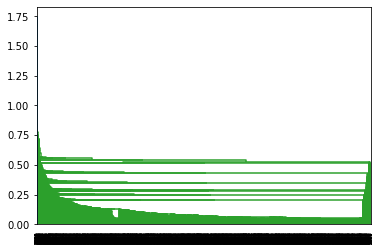

In [111]:
dendrogram(merging)
plt.show()

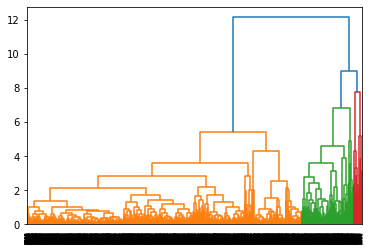

In [112]:
#Complete linkage
merging = linkage(rfm_df_scaled, method='complete', metric='euclidean')
dendrogram(merging)
plt.show()

In [113]:
cluster_no = cut_tree(merging, n_clusters=3)

In [115]:
cluster_no.shape

(4293, 1)

In [116]:
cluster_no = cluster_no.reshape(-1,)

In [117]:
cluster_no

array([0, 1, 0, ..., 0, 0, 0])

In [118]:
final_df.head()

,CustomerID,monetory,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


In [119]:
final_df['cluster_lables'] = cluster_no

In [120]:
final_df.head()

,CustomerID,monetory,frequency,recency,cluster_id,cluster_lables
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,0


<AxesSubplot:xlabel='cluster_lables', ylabel='monetory'>

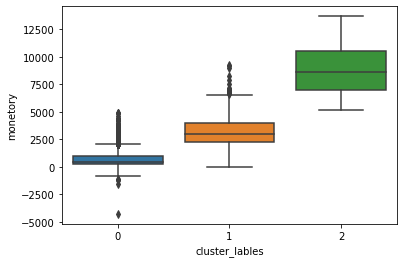

In [122]:
sns.boxplot(x='cluster_lables', y ='monetory', data=final_df)

<AxesSubplot:xlabel='cluster_lables', ylabel='frequency'>

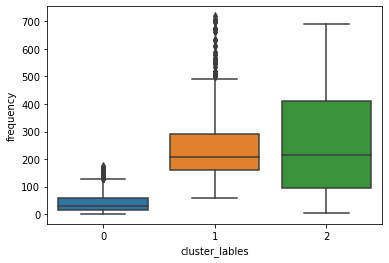

In [123]:
sns.boxplot(x='cluster_lables', y ='frequency', data=final_df)

<AxesSubplot:xlabel='cluster_lables', ylabel='recency'>

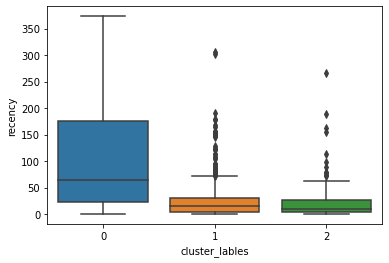

In [124]:
sns.boxplot(x='cluster_lables', y ='recency', data=final_df)

In [126]:
cricket = pd.read_csv('Cricket.csv', sep=',', encoding="ISO-8859-1", header=0)

In [127]:
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [128]:
final_df_1.head()

,Player,SR,Ave,cluster_id
0,SR Tendulkar (INDIA),86.23,44.83,3
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,1
2,RT Ponting (AUS/ICC),80.39,42.03,1
3,ST Jayasuriya (Asia/SL),91.20,32.36,2
4,DPMD Jayawardene (Asia/SL),78.96,33.37,0


In [129]:
final_df_2 = final_df_1[['SR','Ave']]

In [130]:
# instantiate 
scaler = StandardScaler()

# fit_transform 
rfm_df_scaled = scaler.fit_transform(final_df_2)

In [134]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['SR','Ave']

In [135]:
rfm_df_scaled.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


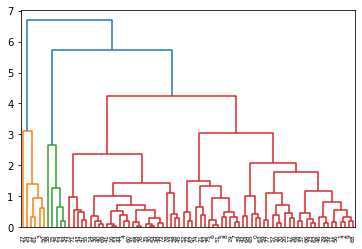

In [136]:
merging = linkage(rfm_df_scaled, method='complete', metric='euclidean')
dendrogram(merging)
plt.show()

In [137]:
cluster_no = cut_tree(merging, n_clusters=4)

In [138]:
cluster_no = cluster_no.reshape(-1,)

In [139]:
cluster_no

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [140]:
final_df_1.head()

,Player,SR,Ave,cluster_id
0,SR Tendulkar (INDIA),86.23,44.83,3
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,1
2,RT Ponting (AUS/ICC),80.39,42.03,1
3,ST Jayasuriya (Asia/SL),91.20,32.36,2
4,DPMD Jayawardene (Asia/SL),78.96,33.37,0


In [141]:
final_df_1['cluster_no'] = cluster_no

In [142]:
final_df_1.head()

,Player,SR,Ave,cluster_id,cluster_no
0,SR Tendulkar (INDIA),86.23,44.83,3,0
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,1,0
2,RT Ponting (AUS/ICC),80.39,42.03,1,0
3,ST Jayasuriya (Asia/SL),91.20,32.36,2,1
4,DPMD Jayawardene (Asia/SL),78.96,33.37,0,2


In [146]:
final_df_1[final_df_1.cluster_no == 0]

,Player,SR,Ave,cluster_id,cluster_no
0,SR Tendulkar (INDIA),86.23,44.83,3,0
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,1,0
2,RT Ponting (AUS/ICC),80.39,42.03,1,0
5,Inzamam-ul-Haq (Asia/PAK),74.24,39.52,1,0
6,JH Kallis (Afr/ICC/SA),72.89,44.36,1,0
7,SC Ganguly (Asia/INDIA),73.70,41.02,1,0
8,R Dravid (Asia/ICC/INDIA),71.24,39.16,1,0
9,BC Lara (ICC/WI),79.51,40.48,1,0
10,TM Dilshan (SL),86.23,39.27,2,0
11,Mohammad Yousuf (Asia/PAK),75.10,41.71,1,0
